In [84]:
# 1) Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,f1_score,accuracy_score

In [85]:
# 2) import the train data
df=pd.read_csv("Week7_train.csv")

In [86]:
# 3. Check the shape of the data 
df.shape

(42000, 785)

In [87]:
# 4. Select only 10 % of the data form experiment
df=df.sample(frac=0.1,random_state=42)

In [88]:
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
5457,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38509,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25536,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31803,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39863,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16041,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4867,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28123,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3780,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
# 5. Print shape of selected dataset
df.shape

(4200, 785)

In [90]:
# 6. Look at the top 5 rows
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
5457,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38509,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25536,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31803,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39863,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
# 7. Find no of unique class labels (one way)
new=df.loc[:,"label"].unique()
new

array([8, 1, 9, 6, 2, 7, 3, 4, 5, 0])

In [92]:
# 8. Print the no of examples for each class label (one way)
new=df.loc[:,"label"].value_counts()
new

label
3    506
1    471
7    438
2    420
9    416
0    408
8    403
6    402
4    397
5    339
Name: count, dtype: int64

<class 'pandas.core.series.Series'>


(4200,)


8


In [97]:
#  9. Prepare x and y
x=df.drop("label",axis=1)
y=df["label"]

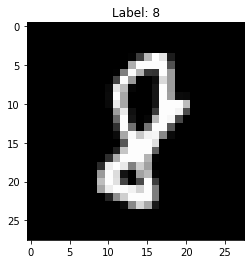

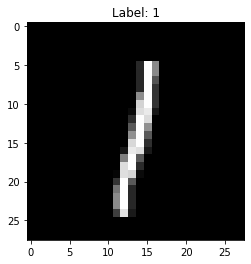

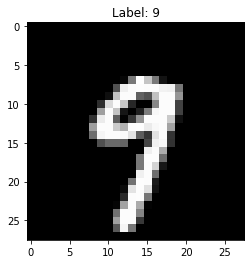

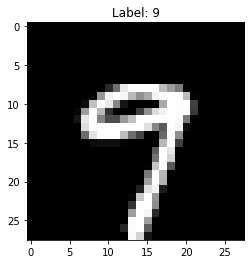

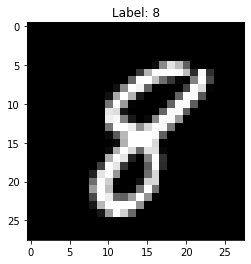

In [98]:

for i in range(5):
    img = x.iloc[i].values.reshape(28, 28)  # get the row as array, reshape to image
    plt.imshow(img, cmap="gray")
    plt.title(f"Label: {y.iloc[i]}")
    plt.show()


In [106]:
x=df.drop("label",axis=1)
y=df["label"]

In [114]:
x.shape

(4200, 784)

In [115]:
y.shape

(4200,)

In [116]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [117]:
model = KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2)
model.fit(x_train, y_train)  # <-- Should work now

KNeighborsClassifier()

In [123]:
# 14. Predic the validation set results 
y_pred=model.predict(x_test)
print(y_pred[:5])

[9 3 6 7 5]


In [124]:
# 15.  Print the confusion matrix 
print(confusion_matrix(y_test,y_pred))

[[ 74   0   0   0   0   0   1   0   0   0]
 [  0 103   0   0   0   0   0   0   0   0]
 [  0   5  64   0   0   0   0   3   0   0]
 [  0   0   1  93   0   3   0   1   1   1]
 [  0   1   0   0  74   0   1   1   0   4]
 [  0   0   0   2   0  67   1   1   0   0]
 [  0   1   0   0   0   0  77   0   0   0]
 [  0   7   1   0   1   0   0  81   0   2]
 [  0   3   0   2   0   1   2   1  75   2]
 [  1   2   0   1   2   0   0   3   0  73]]


In [125]:
# 16. Print classitfication report and accuracy
print("Classification report : \n", classification_report(y_test,y_pred))
print(f"Accuracy score : {accuracy_score(y_test,y_pred):.2f}")


Classification report : 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        75
           1       0.84      1.00      0.92       103
           2       0.97      0.89      0.93        72
           3       0.95      0.93      0.94       100
           4       0.96      0.91      0.94        81
           5       0.94      0.94      0.94        71
           6       0.94      0.99      0.96        78
           7       0.89      0.88      0.89        92
           8       0.99      0.87      0.93        86
           9       0.89      0.89      0.89        82

    accuracy                           0.93       840
   macro avg       0.94      0.93      0.93       840
weighted avg       0.93      0.93      0.93       840

Accuracy score : 0.93


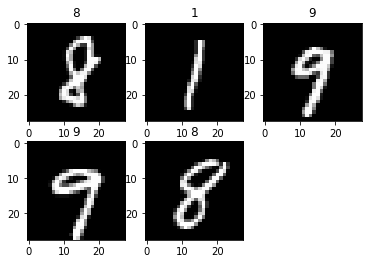

In [149]:
for i in range(5):
    plt.subplot(2,3,i+1)
    img=x.iloc[i].values.reshape(28,28)
    plt.imshow(img,cmap="gray")
    plt.title(f"{y.iloc[i]}")
plt.show()